In [5]:
#cách 1 theo công thức và theo sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
#X1,X2 : chiều cao , cân nặng
X1=np.array([[172,144,182,169,186,160,152 ]]).T #(7,1)
X2=np.array([[65,40,77,66,80,50,42 ]]).T
#giá trị thực bmi
y=np.array([[21.97,19.29,23.25,23.11,23.12,19.53,18.17]]).T

In [6]:
one = np.ones((X1.shape[0], 1)) #tạo ma trận (7, (1))
Xbar = np.concatenate((one, X1,X2), axis = 1)
print(" giá trị của Xbar:\n",Xbar)


 giá trị của Xbar:
 [[  1. 172.  65.]
 [  1. 144.  40.]
 [  1. 182.  77.]
 [  1. 169.  66.]
 [  1. 186.  80.]
 [  1. 160.  50.]
 [  1. 152.  42.]]


In [9]:
#note : .T không ảnh hưởng đến vẽ hình
A = np.dot(Xbar.T, Xbar) #theo công thức
b = np.dot(Xbar.T, y) # #theo công thức
w = np.dot(np.linalg.pinv(A), b)#theo công thức
predict=np.dot(Xbar,w);# y mũ = w_0 + w_1*h + w_2*w
print("giá trị thực:",y.T)
print("Dự đoán chỉ số bmi bằng công thức:\n",predict.T) # in dự đoán chỉ số bmi

giá trị thực: [[21.97 19.29 23.25 23.11 23.12 19.53 18.17]]
Dự đoán chỉ số bmi bằng công thức:
 [[21.62456236 19.56384452 23.42092909 22.67378042 23.51803436 19.26177513
  18.37707412]]


In [10]:
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)
print( 'nghiệm w bằng thư viện scikit-learn  : \n', regr.coef_ )#in nghiệm
predicts=np.dot(Xbar,regr.coef_.T)
print("Dự đoán chỉ số bmi bằng scikit-learn:\n" ,predicts.T)
print("chỉ số bmi theo công thức có trừ trước:\n",y.T)

nghiệm w bằng thư viện scikit-learn  : 
 [[39.54473077 -0.23465761  0.34524524]]
Dự đoán chỉ số bmi bằng scikit-learn:
 [[21.62456236 19.56384452 23.42092909 22.67378042 23.51803436 19.26177513
  18.37707412]]
chỉ số bmi theo công thức có trừ trước:
 [[21.97 19.29 23.25 23.11 23.12 19.53 18.17]]


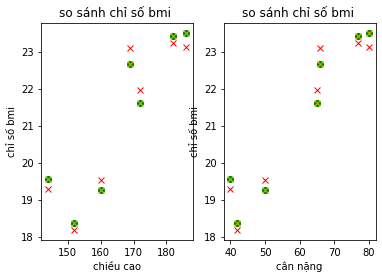

In [11]:
#vẽ hình so sánh:
plt.subplot(1,2,1)
# 1 hàng 2 cột và đây là cột 1
plt.title("so sánh chỉ số bmi ")
plt.xlabel("chiều cao")
plt.ylabel("chỉ số bmi")
plt.plot(X1,y,'rx')
plt.plot(X1,predict,'go')
plt.plot(X1,predicts,'yx')

plt.subplot(1,2,2)
# 1 hàng 2 cột và đây là cột thứ 2
plt.title("so sánh chỉ số bmi ")
plt.xlabel("cân nặng")
plt.ylabel("chỉ số bmi")
plt.plot(X2,y,'rx')#so sánh cân nặng theo thực tế
plt.plot(X2,predict,'go')# so sánh cân nặng theo ct w tính được
plt.plot(X2,predicts,'yx')# so sánh cân nặng theo ct w của sklearn tính được
plt.show()